In [1]:
%load_ext autoreload
%autoreload 2 

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import os
import joblib
from umap import UMAP

from background_detection import process_video_from_nested_archive, plot_svd_spectrum_for_video, plot_reconstruction

# data load

In [14]:
X, frame_shape = process_video_from_nested_archive("data/bmc_real.zip", "Video_008.avi")

Создана общая временная директория: /tmp/tmpqccugy7d

- Поиск в архиве 'bmc_real.zip'...
  -> Найден вложенный архив: 'real/Video_001.zip'
  - Поиск в архиве 'Video_001.zip'...
  - Файл не найден на этом уровне.
  -> Найден вложенный архив: 'real/Video_002.zip'
  - Поиск в архиве 'Video_002.zip'...
  - Файл не найден на этом уровне.
  -> Найден вложенный архив: 'real/Video_003.zip'
  - Поиск в архиве 'Video_003.zip'...
  - Файл не найден на этом уровне.
  -> Найден вложенный архив: 'real/Video_004.zip'
  - Поиск в архиве 'Video_004.zip'...
  - Файл не найден на этом уровне.
  -> Найден вложенный архив: 'real/Video_005.zip'
  - Поиск в архиве 'Video_005.zip'...
  - Файл не найден на этом уровне.
  -> Найден вложенный архив: 'real/Video_006.zip'
  - Поиск в архиве 'Video_006.zip'...
  - Файл не найден на этом уровне.
  -> Найден вложенный архив: 'real/Video_007.zip'
  - Поиск в архиве 'Video_007.zip'...
  - Файл не найден на этом уровне.
  -> Найден вложенный архив: 'real/Video_008.zip'


In [15]:
X

array([[165., 170., 169., ..., 249., 249., 249.],
       [175., 179., 181., ..., 250., 250., 250.],
       [191., 192., 194., ..., 250., 250., 250.],
       ...,
       [110., 110.,  97., ...,  59.,  62.,  64.],
       [ 81.,  81., 103., ...,  67.,  65.,  57.],
       [ 69.,  69., 103., ...,  72.,  66.,  60.]], shape=(76800, 792))

In [16]:
U, s, Vt = np.linalg.svd(X, full_matrices=False)

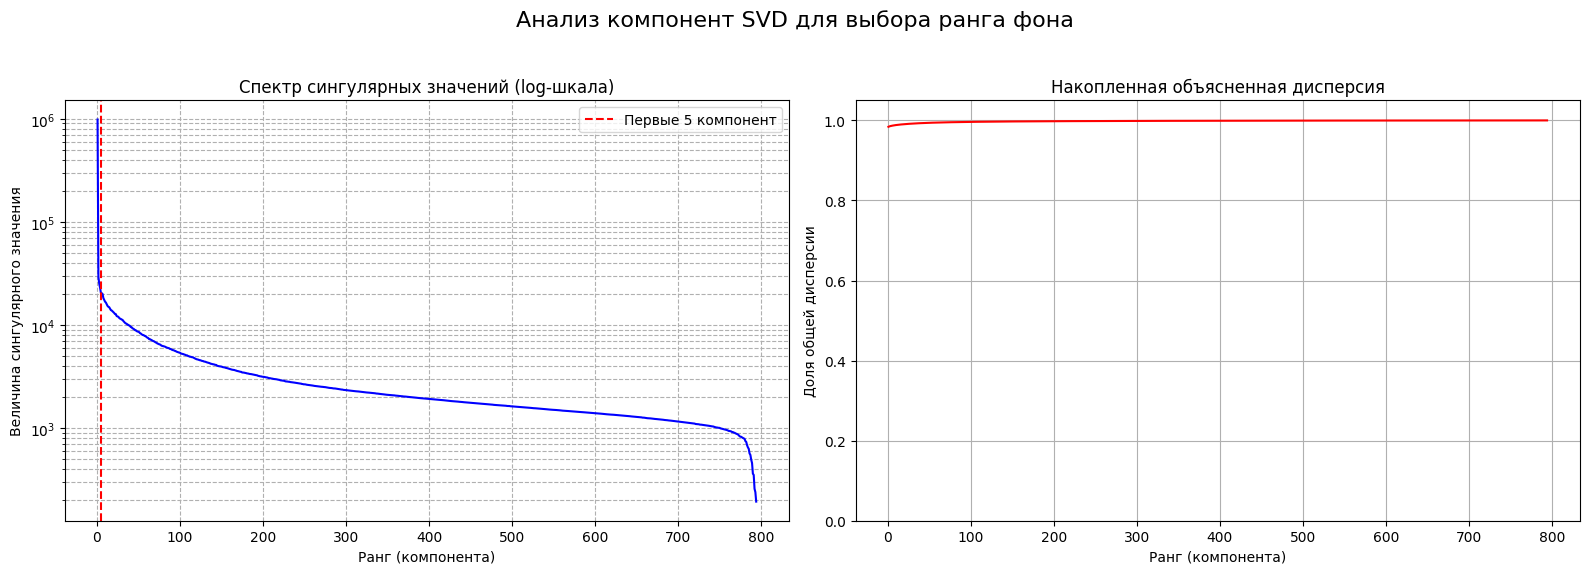

In [10]:
plot_svd_spectrum_for_video(s)

In [17]:
ranks_to_reconstruct = [1, 2, 5, 10]
original_first_frame = X[:, 0].reshape(frame_shape)

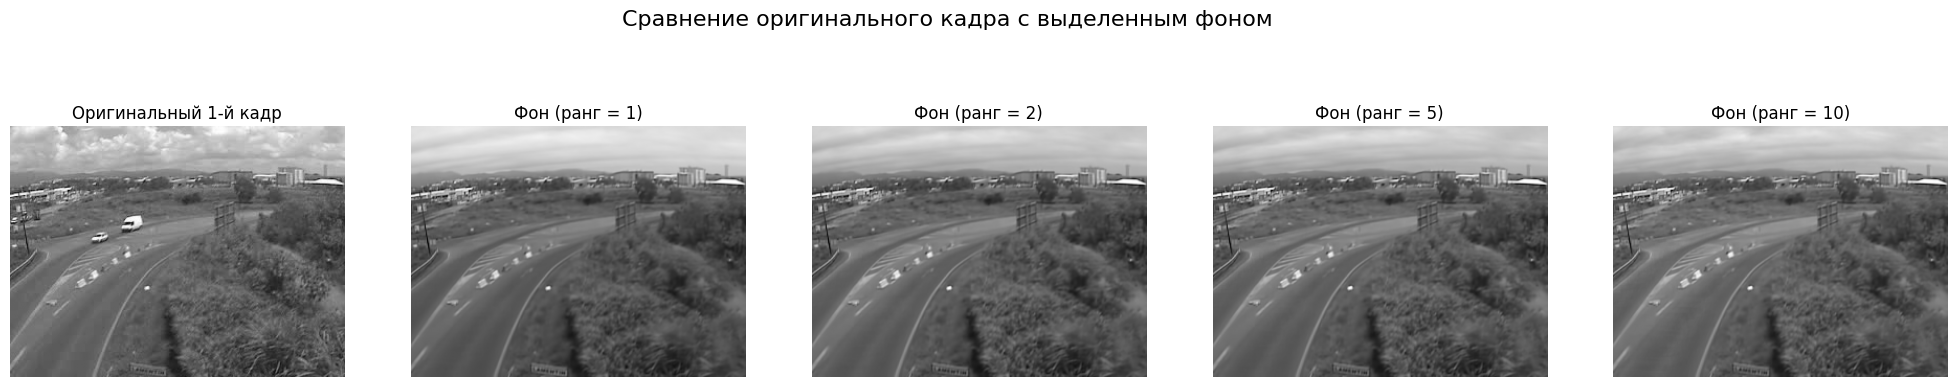

In [18]:
plot_reconstruction(original_first_frame, ranks_to_reconstruct, U, s, Vt, frame_shape)

**В случае видео достаточно 1 компоненты, чтобы восстановиться бэкграунд, т.к. он не меняется из кадра в кадр, а значит его легко выделить в одну значимую компоненту**